In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df_training = pd.read_csv('../input/titanic/train.csv')
df_testing = pd.read_csv('../input/titanic/test.csv')

In [4]:
df_training.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Exploratory Data Analysis

In [5]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Categorical values -> Sex, Ticket, Cabin, Embarked <br>
Numerical Values -> PassengerID, Survived, Pclass, age, SibSp, Parch, Fare <br>
Target label -> Survived

In [7]:
df_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
def continous_plot(df):
    plt.figure(figsize=(7, 4), dpi=100)
    sns.distplot(df, bins=60, hist_kws={'edgecolor':'black'})
def box_plot(df):
    plt.figure(figsize=(7, 4), dpi=100)
    plt.boxplot(df, vert=False)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

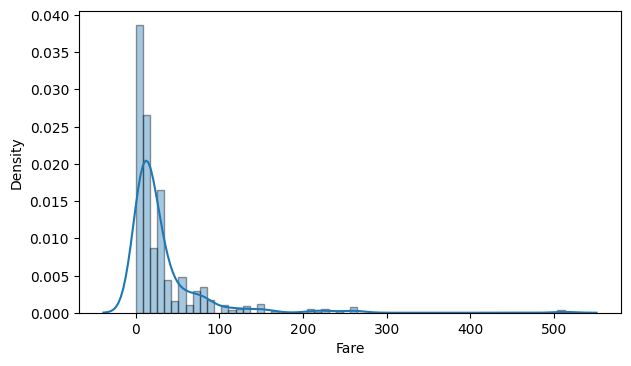

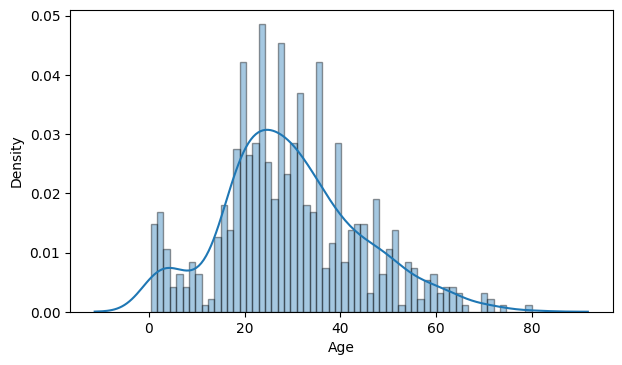

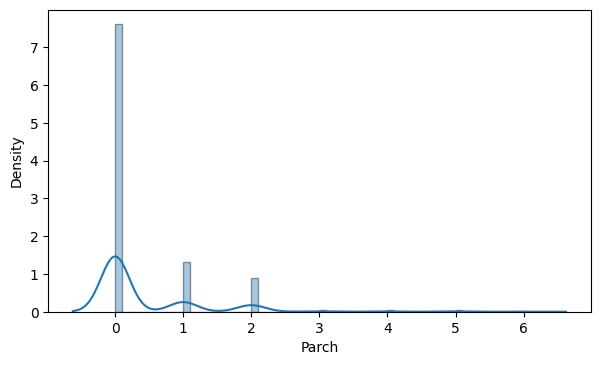

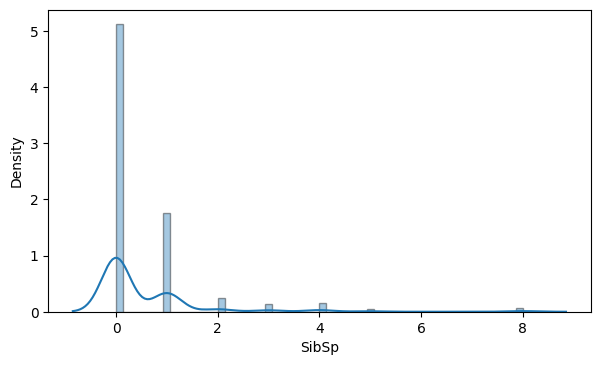

In [9]:
numerical_features = ['Fare', 'Age', 'Parch', 'SibSp']
for feature in numerical_features:
    continous_plot(df_training[feature])

Extreme outlier on Fare features was founded <br>
Most of the features is left skewed

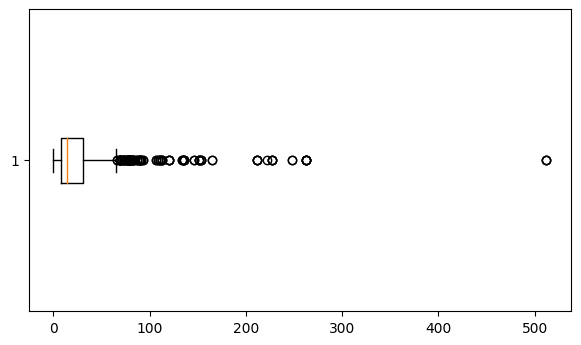

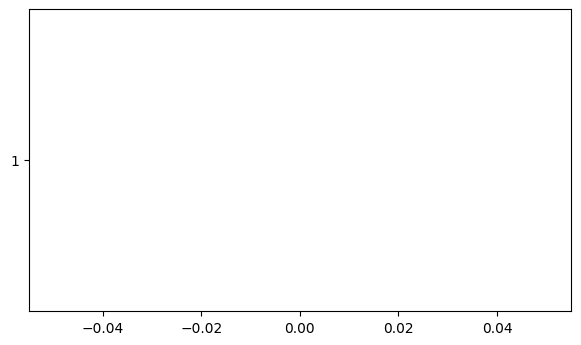

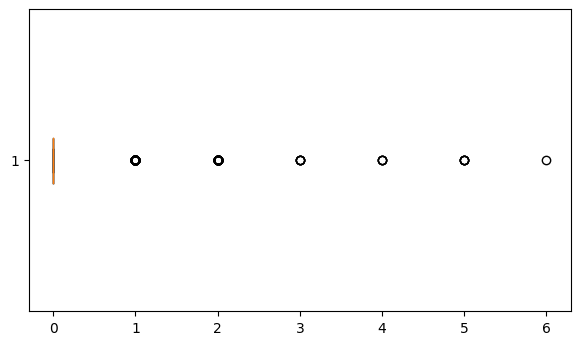

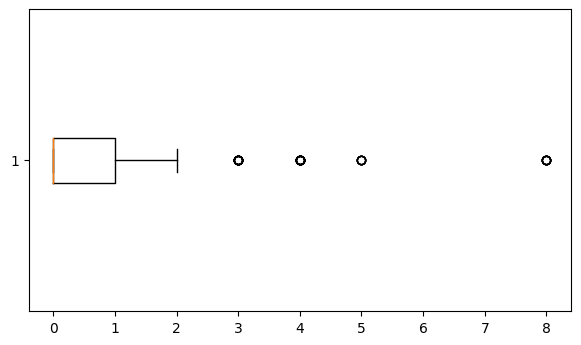

In [10]:
for feature in numerical_features:
    box_plot(df_training[feature])

<AxesSubplot:>

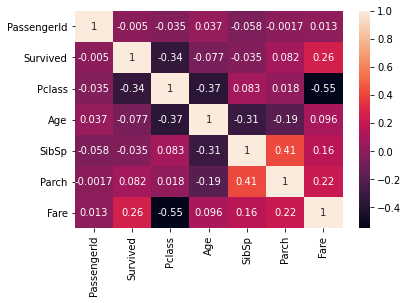

In [11]:
sns.heatmap(df_training.corr(), annot=True)

<AxesSubplot:>

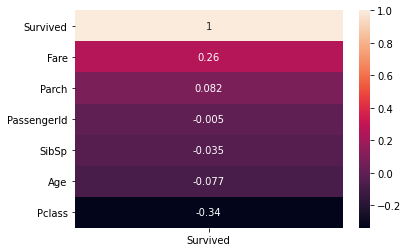

In [12]:
sns.heatmap(df_training.corr()[['Survived']].sort_values(by='Survived', ascending=False), annot=True)

The survivability of a passenger is highly correlated with their Fare

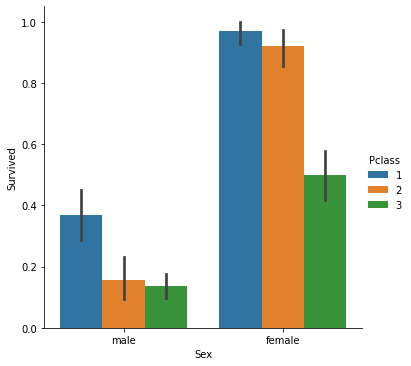

In [13]:
sns.catplot(x="Sex", y="Survived", hue='Pclass', kind="bar", data=df_training)

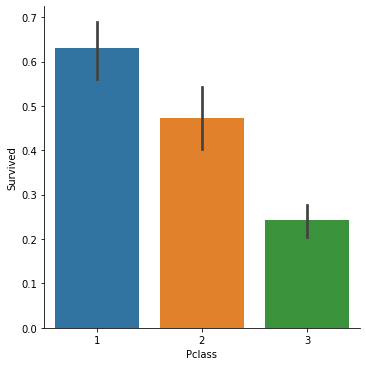

In [14]:
sns.catplot(x="Pclass", y="Survived", kind="bar", data=df_training)

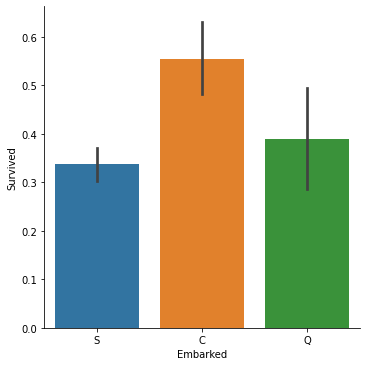

In [15]:
sns.catplot(x="Embarked", y="Survived", kind="bar", data=df_training)

In [16]:
def missing_percentage(df):
    missing = df.isnull().sum()*100/len(df)
    print (missing[missing>0].sort_values())

In [17]:
missing_percentage(df_training)

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64


In [18]:
missing_percentage(df_testing)

Fare      0.239234
Age      20.574163
Cabin    78.229665
dtype: float64


### Dropping cabin features on both training and testing dataset because there's too much missing values

In [19]:
df_training.drop('Cabin', axis=1, inplace=True)

In [20]:
df_testing.drop('Cabin', axis=1, inplace=True)

In [21]:
df_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
df_testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


### For the baseline models, Ticket and Name features will be dropped <br>
-- Removing characters for Ticket feature on the next model will be considered <br>
-- Extracting titles from Name feature will also be considered for the next model

In [23]:
df_training['Ticket'].value_counts()

1601        7
347082      7
CA. 2343    7
CA 2144     6
3101295     6
           ..
343276      1
350047      1
2625        1
17466       1
349216      1
Name: Ticket, Length: 681, dtype: int64

In [24]:
df_testing['Ticket'].value_counts()

PC 17608    5
CA. 2343    4
113503      4
347077      3
220845      3
           ..
112058      1
11813       1
17463       1
17475       1
211535      1
Name: Ticket, Length: 363, dtype: int64

In [25]:
df_training.drop(['Name', 'Ticket'], axis=1, inplace=True)
df_testing.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [26]:
df_training['Age'] = df_training['Age'].fillna(value= df_training['Age'].median())
df_testing['Age'] = df_testing['Age'].fillna(value= df_testing['Age'].median())

In [27]:
df_training['Embarked'] = df_training['Embarked'].fillna(df_training['Embarked'].mode()[0])

In [28]:
missing_percentage(df_training)

Series([], dtype: float64)


In [29]:
df_testing['Fare'] = df_testing['Fare'].fillna(df_testing['Fare'].median())

In [30]:
missing_percentage(df_testing)

Series([], dtype: float64)


### Converting Fare features into categorical values

In [31]:
df_training['Fare_Categories'] = ['1' if (fare <= 7.910400) else '2' if (fare <= 31.000000) else '3' for fare in df_training['Fare']]

In [32]:
df_testing['Fare_Categories'] = ['1' if (fare <= 7.910400) else '2' if (fare <= 31.000000) else '3' for fare in df_testing['Fare']]

In [33]:
df_training_no_fare = df_training.drop('Fare', axis=1)

In [34]:
df_training_no_fare.drop('PassengerId', axis=1, inplace=True)

In [35]:
df_training_categorical = df_training_no_fare.select_dtypes(include='object')
df_training_numerical = df_training_no_fare.select_dtypes(exclude='object')

In [36]:
df_testing_no_fare = df_testing.drop('Fare', axis = 1)

In [37]:
df_testing_no_fare.drop('PassengerId', axis=1, inplace = True)

In [38]:
df_testing_categorical = df_testing_no_fare.select_dtypes(include='object')
df_testing_numerical = df_testing_no_fare.select_dtypes(exclude='object')

In [39]:
df_testing_categorical['training'] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_training_categorical['training'] = 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
combined_categorical_training = pd.concat([df_training_categorical, df_testing_categorical])

In [42]:
combined_categorical_training

,Sex,Embarked,Fare_Categories,training
0,male,S,1,1
1,female,C,3,1
2,female,S,2,1
3,female,S,3,1
4,male,S,2,1
...,...,...,...,...
413,male,S,2,0
414,female,C,3,0
415,male,S,1,0
416,male,S,2,0


In [43]:
df_dummies_combined = pd.get_dummies(combined_categorical_training, drop_first=True)

In [44]:
df_dummies_combined

,training,Sex_male,Embarked_Q,Embarked_S,Fare_Categories_2,Fare_Categories_3
0,1,1,0,1,0,0
1,1,0,0,0,0,1
2,1,0,0,1,1,0
3,1,0,0,1,0,1
4,1,1,0,1,1,0
...,...,...,...,...,...,...
413,0,1,0,1,1,0
414,0,0,0,0,0,1
415,0,1,0,1,0,0
416,0,1,0,1,1,0


In [45]:
df_training_categorical = df_dummies_combined[df_dummies_combined['training']==1]
df_testing_categorical = df_dummies_combined[df_dummies_combined['training']==0]

In [46]:
df_training_categorical

,training,Sex_male,Embarked_Q,Embarked_S,Fare_Categories_2,Fare_Categories_3
0,1,1,0,1,0,0
1,1,0,0,0,0,1
2,1,0,0,1,1,0
3,1,0,0,1,0,1
4,1,1,0,1,1,0
...,...,...,...,...,...,...
886,1,1,0,1,1,0
887,1,0,0,1,1,0
888,1,0,0,1,1,0
889,1,1,0,0,1,0


In [47]:
df_testing_categorical

,training,Sex_male,Embarked_Q,Embarked_S,Fare_Categories_2,Fare_Categories_3
0,0,1,1,0,0,0
1,0,0,0,1,0,0
2,0,1,1,0,1,0
3,0,1,0,1,1,0
4,0,0,0,1,1,0
...,...,...,...,...,...,...
413,0,1,0,1,1,0
414,0,0,0,0,0,1
415,0,1,0,1,0,0
416,0,1,0,1,1,0


In [48]:
df_training_final = pd.concat([df_training_categorical, df_training_numerical], axis=1)
df_testing_final = pd.concat([df_testing_categorical, df_testing_numerical], axis=1)

In [49]:
df_training_final

,training,Sex_male,Embarked_Q,Embarked_S,Fare_Categories_2,Fare_Categories_3,Survived,Pclass,Age,SibSp,Parch
0,1,1,0,1,0,0,0,3,22.0,1,0
1,1,0,0,0,0,1,1,1,38.0,1,0
2,1,0,0,1,1,0,1,3,26.0,0,0
3,1,0,0,1,0,1,1,1,35.0,1,0
4,1,1,0,1,1,0,0,3,35.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,1,1,0,1,1,0,0,2,27.0,0,0
887,1,0,0,1,1,0,1,1,19.0,0,0
888,1,0,0,1,1,0,0,3,28.0,1,2
889,1,1,0,0,1,0,1,1,26.0,0,0


In [50]:
df_testing_final

,training,Sex_male,Embarked_Q,Embarked_S,Fare_Categories_2,Fare_Categories_3,Pclass,Age,SibSp,Parch
0,0,1,1,0,0,0,3,34.5,0,0
1,0,0,0,1,0,0,3,47.0,1,0
2,0,1,1,0,1,0,2,62.0,0,0
3,0,1,0,1,1,0,3,27.0,0,0
4,0,0,0,1,1,0,3,22.0,1,1
...,...,...,...,...,...,...,...,...,...,...
413,0,1,0,1,1,0,3,27.0,0,0
414,0,0,0,0,0,1,1,39.0,0,0
415,0,1,0,1,0,0,3,38.5,0,0
416,0,1,0,1,1,0,3,27.0,0,0


In [51]:
y = df_training_final['Survived']

In [52]:
X = df_training_final.drop('Survived', axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
grid_param = {'n_estimators': [10, 64, 100, 128],
             'criterion': ['gini'],
             'max_depth': [2,3,4,5],
             'min_samples_split': [2,4, 16, 32], 
             'min_samples_leaf': [2,4, 16, 32], 
             'min_impurity_decrease': [0.0,0.1,0.2]}
grid_search_obj = GridSearchCV(RandomForestClassifier(), grid_param)

In [55]:
grid_search_obj.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [2, 4, 16, 32],
                         'min_samples_split': [2, 4, 16, 32],
                         'n_estimators': [10, 64, 100, 128]})

In [56]:
grid_search_obj.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 128}

In [57]:
RDC_obj = RandomForestClassifier(criterion='gini',max_depth= 4,min_impurity_decrease= 0.0,min_samples_leaf=2,min_samples_split= 2,n_estimators= 100)

In [58]:
RDC_obj.fit(X, y)

RandomForestClassifier(max_depth=4, min_samples_leaf=2)

In [59]:
y_pred = RDC_obj.predict(df_testing_final)

In [60]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [61]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('../input/titanic/gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission.csv',index=False)